In [1]:
from griddly import *
from griddly.util.render_tools import RenderToVideo
from griddly import GymWrapperFactory, gd
from gym.wrappers import RecordVideo
from griddly.gym import GymWrapper
from griddly.util.render_tools import RenderToVideo
from griddly.wrappers.render_wrapper import RenderWrapper
import numpy as np
import cv2
import matplotlib.pyplot as plt
import re
import os
import shutil
from collections import defaultdict
import uuid
from random import shuffle, random
from shutil import move
from gym.utils.play import play
from gym.spaces import Box
from tqdm import trange
import random
import sys
import math
import gym

from matplotlib.pyplot import text

import multiprocessing as mp

import sys
import os

# Replace 'my_folder' with the relative path to your target folder
module_path = os.path.abspath(os.path.join('./', 'agents'))
if module_path not in sys.path:
    sys.path.append(module_path)


import random
import copy
from Trainer import *
%matplotlib inline

In [2]:
eval_at = [100, 120, 140, 160, 180, 200, 220]

In [3]:
from QL import *
def train_worker(env_id, episode_length, i):
    trainer = Trainer()
    agent = QL(
        action_size=4,
        learning_rate=0.1,
        gamma=0.99, epsilon=0.05
    )
    env_id = "./env/not_social.yaml"
    length, reward, collisions_humanoid, collisions_wall = trainer.train(env_id=env_id, agent=agent, episode_length=100, eval_at=eval_at)
    env_id = "./env/social.yaml"
    length_1, reward_1, collisions_humanoid_1, collisions_wall_1 = trainer.train(env_id=env_id, agent=agent, episode_length=episode_length, eval_at=eval_at)

    return length+length_1, reward+reward_1, collisions_humanoid+collisions_humanoid_1,collisions_wall+collisions_wall_1

In [4]:
num_env = 30

episode_length = 400
env_id = "./env/social.yaml"

from joblib import Parallel, delayed

results = Parallel(n_jobs=num_env)(
    delayed(train_worker)(env_id, episode_length, i) for i in range(num_env)
)
# Unpack results
all_length_ql, all_reward_ql, all_collisions_humanoid_ql, all_collisions_wall_ql = zip(*results)
all_length_ql = np.array(all_length_ql)
all_reward_ql = np.array(all_reward_ql)
all_collisions_humanoid_ql = np.array(all_collisions_humanoid_ql)
all_collisions_wall_ql = np.array(all_collisions_wall_ql)

# Compute averages
length_mean_ql = np.mean(all_length_ql, axis=0)
reward_mean_ql = np.mean(all_reward_ql, axis=0)
collisions_mean_humanoid_ql = np.mean(all_collisions_humanoid_ql, axis=0)
collisions_mean_wall_ql = np.mean(all_collisions_wall_ql, axis=0)

In [5]:
from SR import *

def train_worker(env_id, episode_length, i):
    trainer = Trainer()
    agent = SR(
        action_size=4,
        learning_rate=0.4,
        w_learning_rate=0.4,
        gamma=0.99, epsilon=0.05
    )
    env_id = "./env/not_social.yaml"
    length, reward, collisions_humanoid, collisions_wall = trainer.train(env_id=env_id, agent=agent, episode_length=100, eval_at=eval_at)
    env_id = "./env/social.yaml"
    length_1, reward_1, collisions_humanoid_1, collisions_wall_1 = trainer.train(env_id=env_id, agent=agent, episode_length=episode_length, eval_at=eval_at)


    return length+length_1, reward+reward_1, collisions_humanoid+collisions_humanoid_1,collisions_wall+collisions_wall_1

In [6]:
num_env = 30

episode_length = 400
env_id = "./env/social.yaml"

from joblib import Parallel, delayed

results = Parallel(n_jobs=num_env)(
    delayed(train_worker)(env_id, episode_length, i) for i in range(num_env)
)
# Unpack results
all_length_sr, all_reward_sr, all_collisions_humanoid_sr, all_collisions_wall_sr = zip(*results)
all_length_sr = np.array(all_length_sr)
all_reward_sr = np.array(all_reward_sr)
all_collisions_humanoid_sr = np.array(all_collisions_humanoid_sr)
all_collisions_wall_sr = np.array(all_collisions_wall_sr)

# Compute averages
length_mean_sr = np.mean(all_length_sr, axis=0)
reward_mean_sr = np.mean(all_reward_sr, axis=0)
collisions_mean_humanoid_sr = np.mean(all_collisions_humanoid_sr, axis=0)
collisions_mean_wall_sr = np.mean(all_collisions_wall_sr, axis=0)

In [ ]:
from MSR import *

def train_worker(env_id, episode_length, i):
    trainer = Trainer()
    agent = MSR(
        action_size=4,
        learning_rate_topo=0.4,
        w_learning_rate_topo=0.4,
        learning_rate_social=0.4,
        w_learning_rate_social=0.4,
        gamma=0.99, epsilon=0.05
    )
    env_id = "./env/not_social.yaml"
    length, reward, collisions_humanoid, collisions_wall = trainer.train(env_id=env_id, agent=agent, episode_length=100, eval_at=eval_at, upd_social=False)
    agent.epsilon = 0.05
    env_id = "./env/social.yaml"
    length_1, reward_1, collisions_humanoid_1, collisions_wall_1 = trainer.train(env_id=env_id, agent=agent, episode_length=episode_length, eval_at=eval_at, upd_social=True)
    
    return length+length_1, reward+reward_1, collisions_humanoid+collisions_humanoid_1,collisions_wall+collisions_wall_1

In [8]:
num_env = 30

episode_length = 400
env_id = "./env/social.yaml"

from joblib import Parallel, delayed
results = Parallel(n_jobs=num_env)(
    delayed(train_worker)(env_id, episode_length, i) for i in range(num_env)
)
# Unpack results
all_length_msr, all_reward_msr, all_collisions_humanoid_msr, all_collisions_wall_msr = zip(*results)
all_length_msr = np.array(all_length_msr)
all_reward_msr = np.array(all_reward_msr)
all_collisions_humanoid_msr = np.array(all_collisions_humanoid_msr)
all_collisions_wall_msr = np.array(all_collisions_wall_msr)

# Compute averages
length_mean_msr = np.mean(all_length_msr, axis=0)
reward_mean_msr = np.mean(all_reward_msr, axis=0)
collisions_mean_humanoid_msr = np.mean(all_collisions_humanoid_msr, axis=0)
collisions_mean_wall_msr = np.mean(all_collisions_wall_msr, axis=0)

In [ ]:
from MQL import *

def train_worker(env_id, episode_length, i):
    trainer = Trainer()
    agent = MQL(
        action_size=4,
        learning_rate=0.05,
        gamma=0.99, epsilon=0.05
    )
    env_id = "./env/not_social.yaml"
    length, reward, collisions_humanoid, collisions_wall = trainer.train(env_id=env_id, agent=agent, episode_length=100, eval_at=eval_at, upd_social=False)
    agent.epsilon = 0.05
    env_id = "./env/social.yaml"
    length_1, reward_1, collisions_humanoid_1, collisions_wall_1 = trainer.train(env_id=env_id, agent=agent, episode_length=episode_length, eval_at=eval_at, upd_social=True)
    
    return length+length_1, reward+reward_1, collisions_humanoid+collisions_humanoid_1,collisions_wall+collisions_wall_1

In [10]:
num_env = 30

episode_length = 400
env_id = "./env/social.yaml"

from joblib import Parallel, delayed
results = Parallel(n_jobs=num_env)(
    delayed(train_worker)(env_id, episode_length, i) for i in range(num_env)
)
# Unpack results
all_length_mql, all_reward_mql, all_collisions_humanoid_mql, all_collisions_wall_mql = zip(*results)
all_length_mql = np.array(all_length_mql)
all_reward_mql = np.array(all_reward_mql)
all_collisions_humanoid_mql = np.array(all_collisions_humanoid_mql)
all_collisions_wall_mql = np.array(all_collisions_wall_mql)

# Compute averages
length_mean_mql = np.mean(all_length_mql, axis=0)
reward_mean_mql = np.mean(all_reward_mql, axis=0)
collisions_mean_humanoid_mql = np.mean(all_collisions_humanoid_mql, axis=0)
collisions_mean_wall_mql = np.mean(all_collisions_wall_mql, axis=0)

In [ ]:
from QL import *

def train_worker(env_id, episode_length, i):
    trainer = Trainer()
    agent = QL(
        action_size=4,
        learning_rate=0.5,
        gamma=0.99, epsilon=0.05
    )
    agent.epsilon = 0.05
    env_id = "./env/social.yaml"
    length_1, reward_1, collisions_humanoid_1, collisions_wall_1 = trainer.train(env_id=env_id, agent=agent, episode_length=episode_length, eval_at=eval_at, upd_social=True)
    
    return length_1, reward_1, collisions_humanoid_1,collisions_wall_1

In [12]:
num_env = 30

episode_length = 400
env_id = "./env/social.yaml"

from joblib import Parallel, delayed
results = Parallel(n_jobs=num_env)(
    delayed(train_worker)(env_id, episode_length, i) for i in range(num_env)
)
# Unpack results
all_length_ql_no_trans, all_reward_ql_no_trans, all_collisions_humanoid_ql_no_trans, all_collisions_wall_ql_no_trans = zip(*results)


all_length_ql_no_trans = np.array(all_length_ql_no_trans)
all_reward_ql_no_trans = np.array(all_reward_ql_no_trans)
all_collisions_humanoid_ql_no_trans = np.array(all_collisions_humanoid_ql_no_trans)
all_collisions_wall_ql_no_trans = np.array(all_collisions_wall_ql_no_trans)

# Compute averages
length_mean_ql_no_trans = np.mean(all_length_ql_no_trans, axis=0)
reward_mean_ql_no_trans = np.mean(all_reward_ql_no_trans, axis=0)
collisions_mean_humanoid_ql_no_trans = np.mean(all_collisions_humanoid_ql_no_trans, axis=0)
collisions_mean_wall_ql_no_trans = np.mean(all_collisions_wall_ql_no_trans, axis=0)

In [13]:
import numpy as np

def compute_rolling(data, window_size=10, split_point=100):
    def rolling_avg(x, w):
        pad_width = w // 2
        x_padded = np.pad(x, (pad_width, w - 1 - pad_width), mode='edge')
        return np.convolve(x_padded, np.ones(w) / w, mode='valid')

    # Split data
    before = data[:split_point]
    after = data[split_point:]

    # Compute rolling averages with padding
    before_avg = rolling_avg(before, window_size)
    after_avg = rolling_avg(after, window_size)

    # Combine
    combined = np.empty_like(data, dtype=np.float64)
    combined[:split_point] = before_avg
    combined[split_point:] = after_avg

    return combined


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


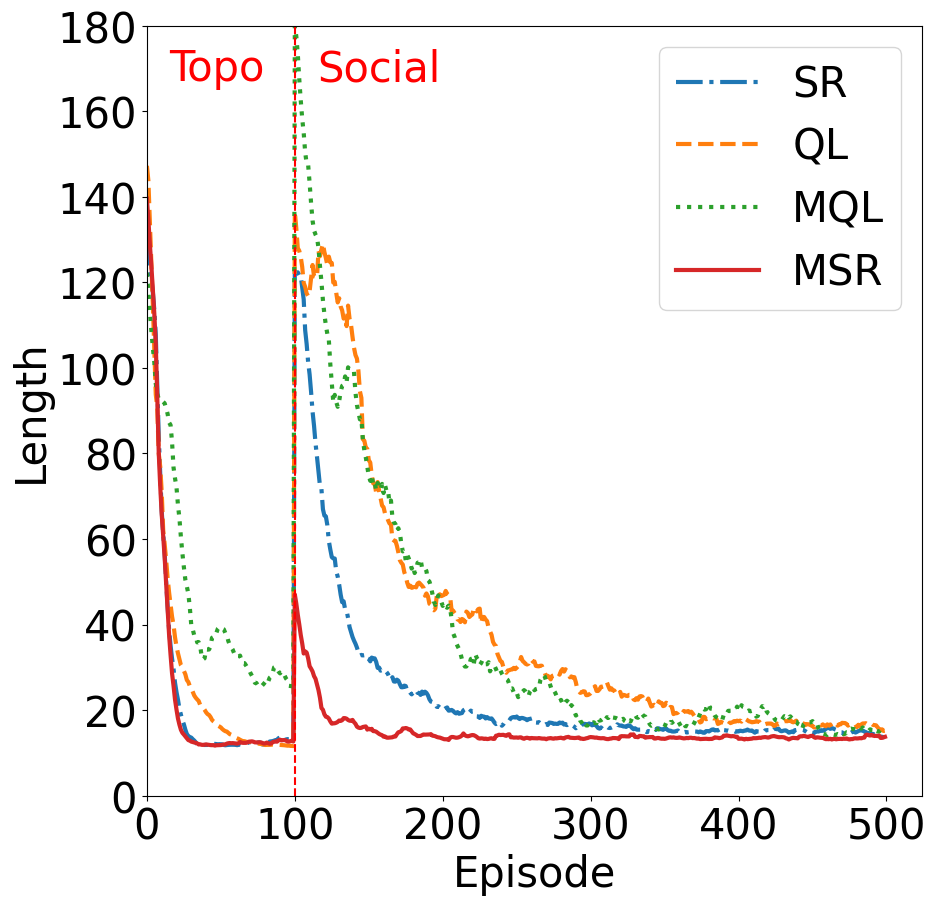

In [14]:
from matplotlib.pyplot import text
plt.rcParams.update({'font.size': 30})

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)

window_size = 10
length_mean_sr_rolling = compute_rolling(length_mean_sr)
length_mean_ql_rolling = compute_rolling(length_mean_ql)
length_mean_msr_rolling = compute_rolling(length_mean_msr)
length_mean_mql_rolling = compute_rolling(length_mean_mql)


ax.plot(length_mean_sr_rolling, label="SR", linestyle='-.', linewidth=3)

ax.plot(length_mean_ql_rolling, label="QL",linestyle='--', linewidth=3)

ax.plot(length_mean_mql_rolling, label="MQL", linestyle=':', linewidth=3)

ax.plot(length_mean_msr_rolling, label="MSR", linewidth=3)


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_ylim(0, 180)

plt.legend()
plt.xlabel("Episode")
plt.ylabel("Length")

plt.vlines(x=100, ymin=0, ymax=200, color = 'r', linestyles='dashed')
text(15, 170, "Topo", verticalalignment='center', color = 'r', fontsize="30")
text(115, 170, "Social", verticalalignment='center', color = 'r', fontsize="30")

plt.savefig("figs/length.eps", format='eps', bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


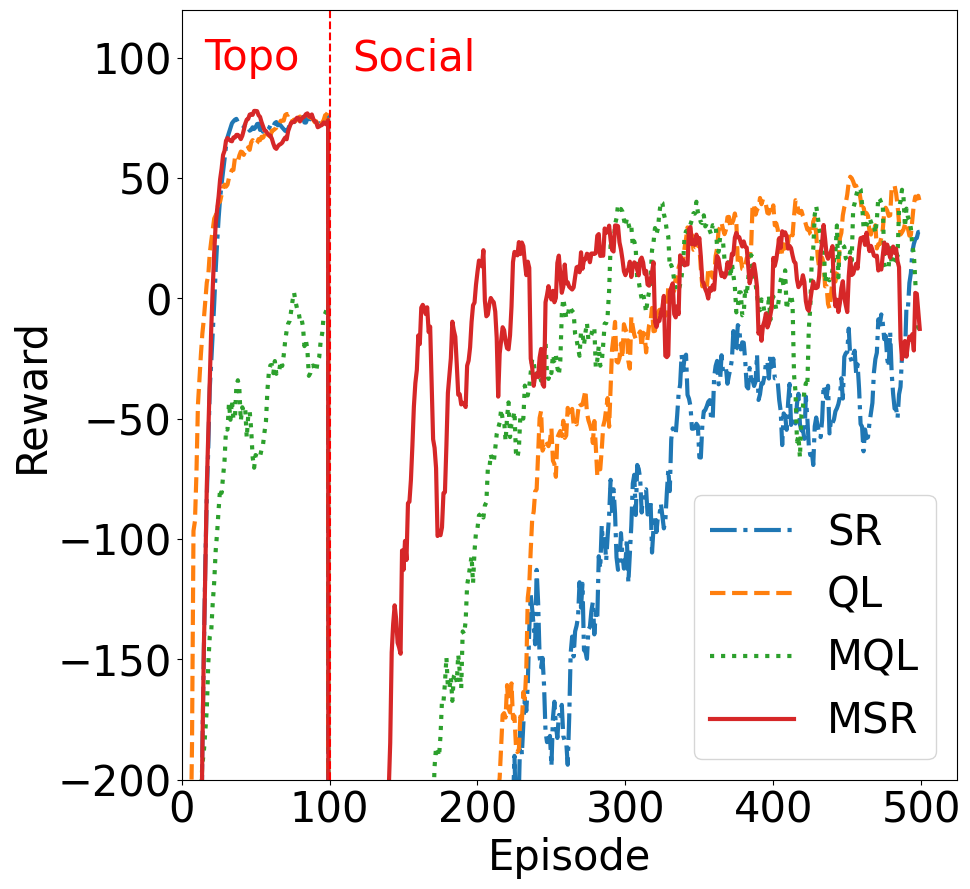

In [15]:
from matplotlib.pyplot import text

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)

window_size = 10
reward_mean_sr_rolling = compute_rolling(reward_mean_sr)
reward_mean_ql_rolling = compute_rolling(reward_mean_ql)
reward_mean_msr_rolling = compute_rolling(reward_mean_msr)
reward_mean_mql_rolling = compute_rolling(reward_mean_mql)

ax.plot(reward_mean_sr_rolling, label="SR", linestyle='-.', linewidth=3)

ax.plot(reward_mean_ql_rolling, label="QL", linestyle='--', linewidth=3)

ax.plot(reward_mean_mql_rolling, label="MQL", linestyle=':', linewidth=3)

ax.plot(reward_mean_msr_rolling, label="MSR", linewidth=3)

ax.set_xlim(left=0)
ax.set_ylim(-200, 120)

plt.legend()
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.vlines(x=100, ymin=-200, ymax=200, color = 'r', linestyles='dashed')
text(15, 100, "Topo", verticalalignment='center', color = 'r', fontsize="30")
text(115, 100, "Social", verticalalignment='center', color = 'r', fontsize="30")
plt.savefig("figs/reward.eps", format='eps',bbox_inches='tight')



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


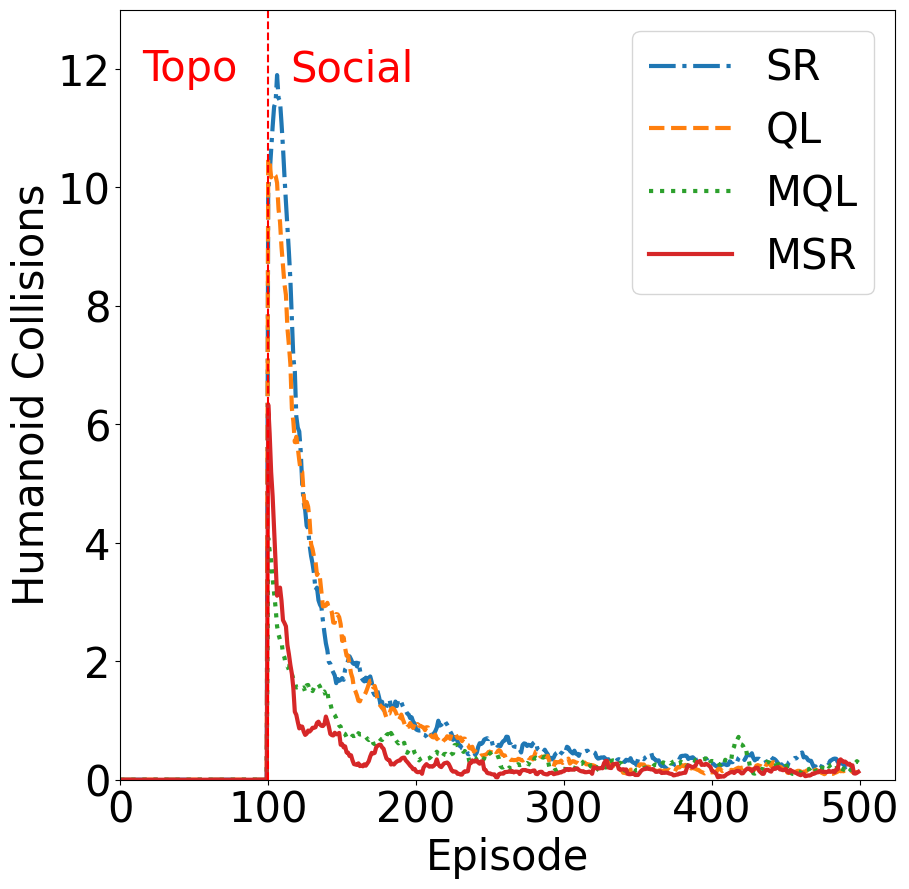

In [16]:
from matplotlib.pyplot import text

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)

window_size = 10
collisions_mean_humanoid_sr_rolling = compute_rolling(collisions_mean_humanoid_sr)
collisions_mean_humanoid_ql_rolling = compute_rolling(collisions_mean_humanoid_ql)
collisions_mean_humanoid_msr_rolling = compute_rolling(collisions_mean_humanoid_msr)
collisions_mean_humanoid_mql_rolling = compute_rolling(collisions_mean_humanoid_mql)

ax.plot(collisions_mean_humanoid_sr_rolling, label="SR", linestyle='-.', linewidth=3)

ax.plot(collisions_mean_humanoid_ql_rolling, label="QL", linestyle='--', linewidth=3)

ax.plot(collisions_mean_humanoid_mql_rolling, label="MQL", linestyle=':', linewidth=3)

ax.plot(collisions_mean_humanoid_msr_rolling, label="MSR", linewidth=3)

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_ylim(0, 13)

plt.legend()
plt.xlabel("Episode")
plt.ylabel("Humanoid Collisions")
plt.vlines(x=100, ymin=0, ymax=13, color = 'r', linestyles='dashed')
text(15, 12, "Topo", verticalalignment='center', color = 'r', fontsize="30")
text(115, 12, "Social", verticalalignment='center', color = 'r', fontsize="30")
plt.savefig("figs/human_collisions.eps", format='eps', bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


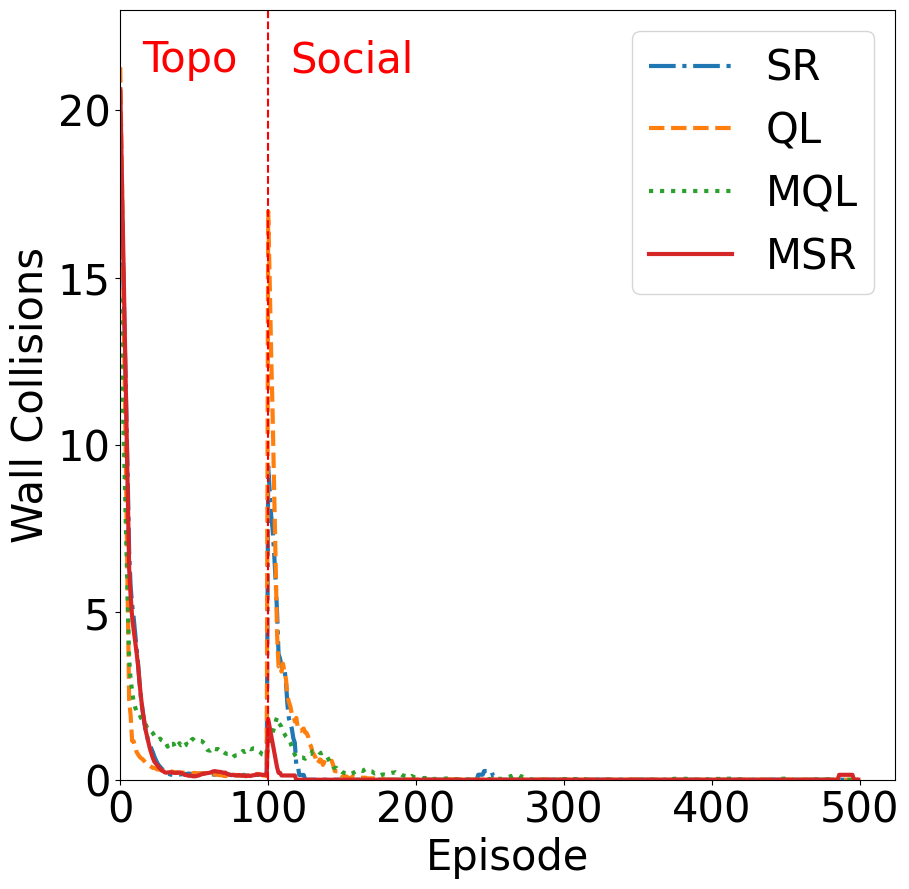

In [17]:
from matplotlib.pyplot import text

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)

window_size = 10
collisions_mean_wall_sr_rolling = compute_rolling(collisions_mean_wall_sr)
collisions_mean_wall_ql_rolling = compute_rolling(collisions_mean_wall_ql)
collisions_mean_wall_msr_rolling = compute_rolling(collisions_mean_wall_msr)
collisions_mean_wall_mql_rolling = compute_rolling(collisions_mean_wall_mql)

ax.plot(collisions_mean_wall_sr_rolling, label="SR", linestyle='-.', linewidth=3)

ax.plot(collisions_mean_wall_ql_rolling, label="QL", linestyle='--', linewidth=3)

ax.plot(collisions_mean_wall_mql_rolling, label="MQL",  linestyle=':', linewidth=3)

ax.plot(collisions_mean_wall_msr_rolling, label="MSR", linewidth=3)

plt.vlines(x=100, ymin=0, ymax=23, color = 'r', linestyles='dashed')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Wall Collisions")
ax.set_ylim(0, 23)
text(15, 21.5, "Topo", verticalalignment='center', color = 'r', fontsize="30")
text(115, 21.5, "Social", verticalalignment='center', color = 'r', fontsize="30")

plt.savefig("figs/wall_collisions.eps", format='eps',  bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


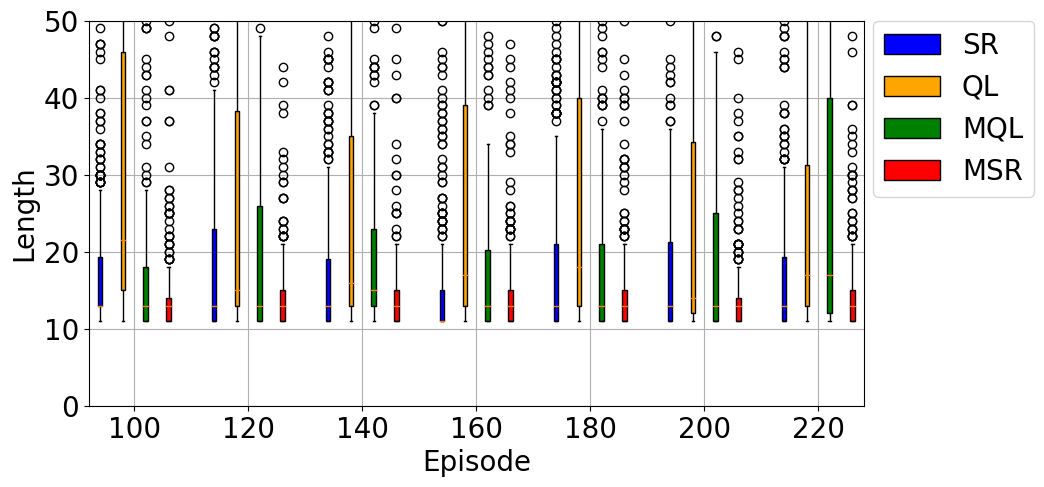

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 20})

np.random.seed(0)
ep_100 = [all_length_sr[eval_at[0]], all_length_ql[eval_at[0]] , all_length_mql[eval_at[0]],all_length_msr[eval_at[0]]]
ep_120 = [all_length_sr[eval_at[1]], all_length_ql[eval_at[1]] , all_length_mql[eval_at[1]],all_length_msr[eval_at[1]]]
ep_140 = [all_length_sr[eval_at[2]], all_length_ql[eval_at[2]] , all_length_mql[eval_at[2]],all_length_msr[eval_at[2]]]
ep_160 = [all_length_sr[eval_at[3]], all_length_ql[eval_at[3]] , all_length_mql[eval_at[3]],all_length_msr[eval_at[3]]]
ep_180 = [all_length_sr[eval_at[4]], all_length_ql[eval_at[4]] , all_length_mql[eval_at[4]],all_length_msr[eval_at[4]]]
ep_200 = [all_length_sr[eval_at[5]], all_length_ql[eval_at[5]] , all_length_mql[eval_at[5]],all_length_msr[eval_at[5]]]
ep_220 = [all_length_sr[eval_at[6]], all_length_ql[eval_at[6]] , all_length_mql[eval_at[6]],all_length_msr[eval_at[6]]]

data = [ep_100, ep_120, ep_140, ep_160, ep_180, ep_200, ep_220]

# Parameters
num_groups = len(data)
num_subgroups = len(data[0])
width = 0.2  # box width
spacing = 1  # spacing between groups

# Compute positions for each subgroup in each group
positions = []
labels = []
for i in range(num_groups):
    base = i * (num_subgroups + spacing)
    for j in range(num_subgroups):
        positions.append(base + j)
        labels.append(f'M{i+1}-C{j+1}')  # optional custom label

# Flatten data list
all_data = [d for group in data for d in group]

# Plot
plt.figure(figsize=(10, 5))
bp = plt.boxplot(all_data, positions=positions, widths=width, patch_artist=True)

# Coloring
colors = ['blue', 'orange', 'green', 'red']
for i, box in enumerate(bp['boxes']):
    box.set_facecolor(colors[i % num_subgroups])

# Customize x-axis
group_centers = [i * (num_subgroups + spacing) + (num_subgroups - 1) / 2 for i in range(num_groups)]
plt.xticks(group_centers, ['100', '120', '140', '160', '180', '200', '220'])
plt.xlabel("Episode")
plt.ylabel("Length")
plt.ylim(0, 50)
plt.grid(True)
plt.legend([bp["boxes"][0], bp["boxes"][1], bp["boxes"][2], bp["boxes"][3]], ['SR', 'QL', 'MQL', 'MSR'], loc='upper right', bbox_to_anchor=(1.22, 1),  # X and Y offsets
           borderaxespad=0.)

plt.savefig("figs/length_box.eps", format='eps', bbox_inches="tight")
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


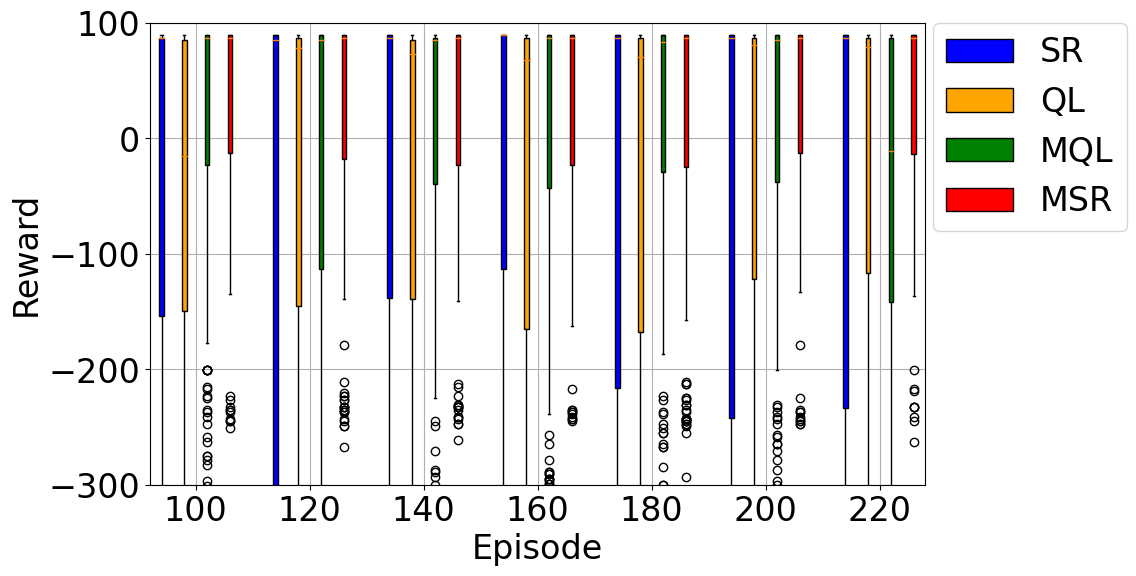

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 24})

np.random.seed(0)
ep_100 = [all_reward_sr[eval_at[0]], all_reward_ql[eval_at[0]], all_reward_mql[eval_at[0]],all_reward_msr[eval_at[0]]]
ep_120 = [all_reward_sr[eval_at[1]], all_reward_ql[eval_at[1]], all_reward_mql[eval_at[1]],all_reward_msr[eval_at[1]]]
ep_140 = [all_reward_sr[eval_at[2]], all_reward_ql[eval_at[2]], all_reward_mql[eval_at[2]],all_reward_msr[eval_at[2]]]
ep_160 = [all_reward_sr[eval_at[3]], all_reward_ql[eval_at[3]], all_reward_mql[eval_at[3]],all_reward_msr[eval_at[3]]]
ep_180 = [all_reward_sr[eval_at[4]], all_reward_ql[eval_at[4]], all_reward_mql[eval_at[4]],all_reward_msr[eval_at[4]]]
ep_200 = [all_reward_sr[eval_at[5]], all_reward_ql[eval_at[5]], all_reward_mql[eval_at[5]],all_reward_msr[eval_at[5]]]
ep_220 = [all_reward_sr[eval_at[6]], all_reward_ql[eval_at[6]], all_reward_mql[eval_at[6]],all_reward_msr[eval_at[6]]]


data = [ep_100, ep_120, ep_140, ep_160, ep_180, ep_200, ep_220]

# Parameters
num_groups = len(data)
num_subgroups = len(data[0])
width = 0.2  # box width
spacing = 1  # spacing between groups

# Compute positions for each subgroup in each group
positions = []
labels = []
for i in range(num_groups):
    base = i * (num_subgroups + spacing)
    for j in range(num_subgroups):
        positions.append(base + j)
        labels.append(f'M{i+1}-C{j+1}')  # optional custom label

# Flatten data list
all_data = [d for group in data for d in group]

# Plot
plt.figure(figsize=(10, 6))
bp = plt.boxplot(all_data, positions=positions, widths=width, patch_artist=True)

# Coloring
colors = ['blue', 'orange', 'green', 'red']
for i, box in enumerate(bp['boxes']):
    box.set_facecolor(colors[i % num_subgroups])

# Customize x-axis
group_centers = [i * (num_subgroups + spacing) + (num_subgroups - 1) / 2 for i in range(num_groups)]
plt.xticks(group_centers, ['100', '120', '140', '160', '180', '200', '220'])
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.ylim(-300, 100)
plt.grid(True)
plt.legend([bp["boxes"][0], bp["boxes"][1], bp["boxes"][2], bp["boxes"][3]], ['SR', 'QL', 'MQL', 'MSR'], loc='upper right', bbox_to_anchor=(1.26, 1),  # X and Y offsets
           borderaxespad=0.)

plt.savefig("figs/reward_box.eps", format='eps', bbox_inches="tight")

plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


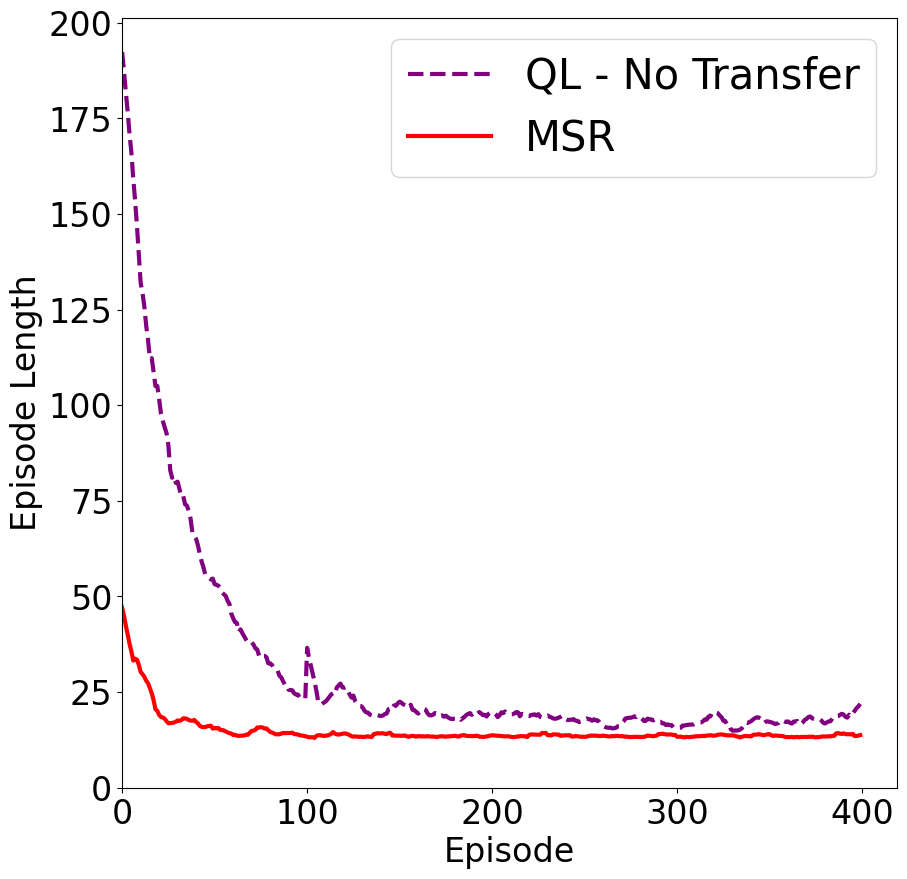

In [20]:
from matplotlib.pyplot import text

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)

window_size = 10

length_mean_msr_rolling = compute_rolling(length_mean_msr)
length_mean_ql_no_trans_rolling = compute_rolling(length_mean_ql_no_trans)

ax.plot(length_mean_ql_no_trans_rolling, color="purple", label="QL - No Transfer", linewidth=3, linestyle='--')
ax.plot(length_mean_msr_rolling[100:], color='r', label="MSR", linewidth=3)

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.rcParams.update({'font.size': 30})

plt.legend()
plt.xlabel("Episode")
plt.ylabel("Episode Length")

plt.savefig("figs/length_transfer.eps", format='eps', bbox_inches="tight")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


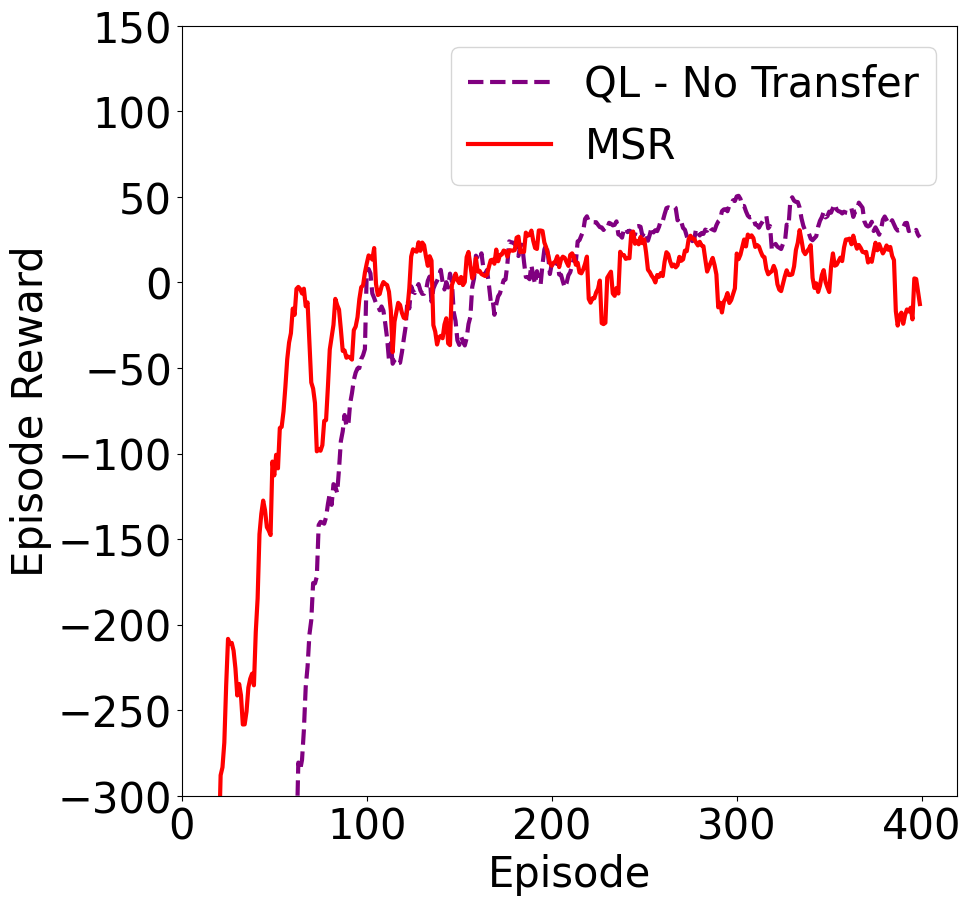

In [21]:
from matplotlib.pyplot import text

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)

window_size = 10
reward_mean_msr_rolling = compute_rolling(reward_mean_msr)
reward_mean_ql_no_trans_rolling = compute_rolling(reward_mean_ql_no_trans)

ax.set_ylim(-300, 150)

ax.plot(reward_mean_ql_no_trans_rolling, color="purple", label="QL - No Transfer", linewidth=3, linestyle='--')
ax.plot(reward_mean_msr_rolling[100:], color = "r", label="MSR", linewidth=3)

ax.set_xlim(left=0)

plt.legend()
plt.xlabel("Episode")
plt.ylabel("Episode Reward")

plt.savefig("figs/reward_transfer.eps", format='eps', bbox_inches="tight")



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


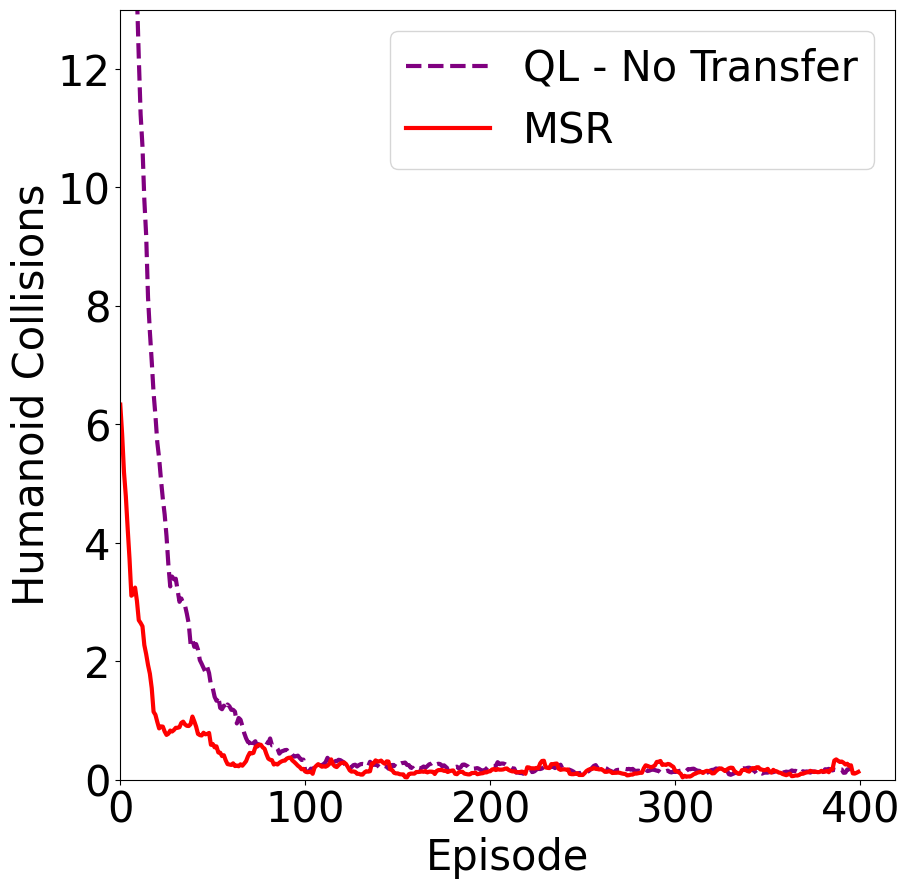

In [22]:
from matplotlib.pyplot import text

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)

window_size = 10

collisions_mean_humanoid_msr_rolling = compute_rolling(collisions_mean_humanoid_msr)
collisions_mean_humanoid_ql_no_trans_rolling = compute_rolling(collisions_mean_humanoid_ql_no_trans)


ax.plot(collisions_mean_humanoid_ql_no_trans_rolling, label="QL - No Transfer", color="purple", linewidth=3, linestyle="--")
ax.plot(collisions_mean_humanoid_msr_rolling[100:], label="MSR", linewidth=3, color="r")


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_ylim(0, 13)

plt.legend()
plt.xlabel("Episode")
plt.ylabel("Humanoid Collisions")

plt.savefig("figs/human_collisions_transfer.eps", format='eps', bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


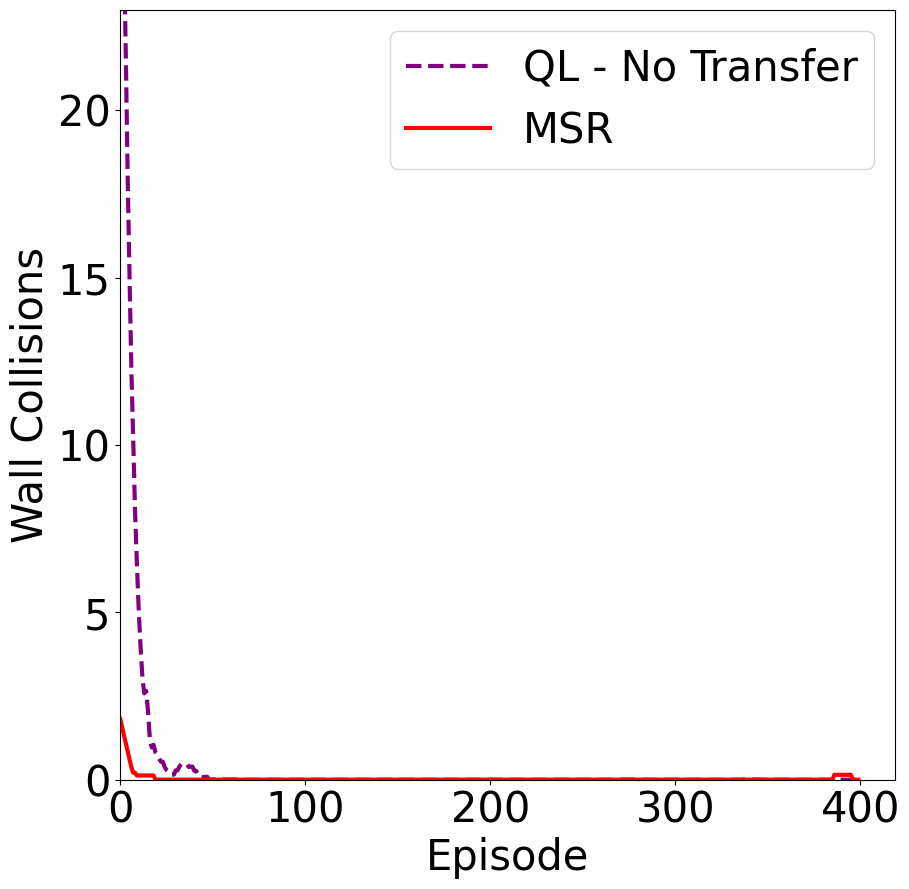

In [23]:
from matplotlib.pyplot import text

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)

window_size = 10

collisions_mean_wall_msr_rolling = compute_rolling(collisions_mean_wall_msr)
collisions_mean_wall_ql_no_trans_rolling = compute_rolling(collisions_mean_wall_ql_no_trans)

ax.plot(collisions_mean_wall_ql_no_trans_rolling, label="QL - No Transfer", color="purple", linewidth=3, linestyle="--")
ax.plot(collisions_mean_wall_msr_rolling[100:], label="MSR", linewidth=3, color='r')

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Wall Collisions")
ax.set_ylim(0, 23)

plt.savefig("figs/wall_collisions_transfer.eps", format='eps',  bbox_inches='tight')